# Playing with the visits table 

### Alex Lu | Summer Q 17-18  
---

September 2018

**OBJECTIVE**

---

I have been tasked with getting distributions of age, sex, for Arbor and PFC patients over the last year. This notebook examines the age and sex distributions from a visits paradigm (and not a unique'd patients paradigm). 

First, let's import all of the stuff that we'll need

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
import seaborn as sns
from utils.indicator import *
from utils.file_ops import *
from datetime import datetime
%matplotlib inline

We want to filter on the time of visit for longitudinal visualization. First, we should do a conversion on the format of the time string to make it more workable. Then, we're going to make this new 'ts' column the index, and drop the string form VisitDate series. 

In [2]:
def time_filter(t1, t2, df):
    # accepts numerical tuples of form (year, mon, day)
    bound1 = datetime(*t1)
    bound2 = datetime(*t2)
    return df[bound1:bound2]

In [3]:
path_visits = "visits_data/both_clinics_all_past.csv"
df_visits = pd.read_csv(path_visits, error_bad_lines=False, header=0)
df_visits.head()

,LocationAbbreviation,PatientNumber,Age(Year),VisitType,DateFirstKnown,VisitDateTime,Sex
0,PFC,N0053729,52,PFC FAST TRACK,3/12/2016 10:53:40 AM,6/3/2017 9:00:00 AM,U
1,PFC,N0057510,37,PFC MENTAL HEALTH VISIT,9/10/2016 11:31:38 AM,6/3/2017 9:30:00 AM,F
2,PFC,N0061163,55,PFC NEW PATIENT VISIT,6/3/2017 8:08:00 AM,6/3/2017 9:30:00 AM,F
3,PFC,N0061170,66,PFC NEW PATIENT VISIT,6/3/2017 8:10:03 AM,6/3/2017 9:50:00 AM,F
4,PFC,N0061188,48,PFC NEW PATIENT VISIT,6/3/2017 8:10:46 AM,6/3/2017 10:10:00 AM,F


In [4]:
df_visits['VisitDateTimeTS'] = pd.to_datetime((df_visits['VisitDateTime']))
df_visits['DateFirstKnownTS'] = pd.to_datetime((df_visits['DateFirstKnown']))
df_visits.index = df_visits['VisitDateTimeTS']
#df_visits = df_visits.iloc[::-1]
del df_visits['DateFirstKnown']
del df_visits['VisitDateTime']

df_visits = df_visits[df_visits['LocationAbbreviation'] != 'TEST']
arbor_general_visits = df_visits[df_visits['VisitType'] == 'ARBOR GENERAL VISIT']
pfc_general_visits = df_visits[df_visits['VisitType'] == 'PFC NEW PATIENT VISIT']

print arbor_general_visits.describe()
print pfc_general_visits.describe()

        Age(Year)
count  507.000000
mean    48.830375
std     17.821990
min      0.000000
25%     33.000000
50%     51.000000
75%     64.000000
max     87.000000
        Age(Year)
count  380.000000
mean    51.660526
std     17.312677
min      4.000000
25%     37.000000
50%     54.000000
75%     64.000000
max     88.000000


In [5]:
arbor_general_visits.head(5)

,LocationAbbreviation,PatientNumber,Age(Year),VisitType,Sex,VisitDateTimeTS,DateFirstKnownTS
VisitDateTimeTS,,,,,,,
2017-06-04 09:30:00,AFC,N0061220,78,ARBOR GENERAL VISIT,M,2017-06-04 09:30:00,2017-06-04 08:33:26
2017-06-04 09:45:00,AFC,N0061238,76,ARBOR GENERAL VISIT,M,2017-06-04 09:45:00,2017-06-04 08:46:12
2017-06-04 10:00:00,AFC,N0061245,31,ARBOR GENERAL VISIT,F,2017-06-04 10:00:00,2017-06-04 09:44:53
2017-06-04 10:15:00,AFC,N0061260,41,ARBOR GENERAL VISIT,F,2017-06-04 10:15:00,2017-06-04 11:10:08
2017-06-04 10:30:00,AFC,N0061277,73,ARBOR GENERAL VISIT,M,2017-06-04 10:30:00,2017-06-04 11:12:36


Let's take a look and make sure we're looking at the right stuff

In [6]:
def temporal_distribution(df, ts_name = 'ts'):
    '''

    '''
    time_gb = df.groupby(df[ts_name].dt.month)
    plt.figure()
    time_gb.plot()
    plt.show()


In [7]:
arbor_general_visits['Sex'].value_counts(normalize=True)

F    0.477318
M    0.408284
U    0.114398
Name: Sex, dtype: float64

In [8]:
pfc_general_visits['Sex'].value_counts(normalize=True)

F    0.521053
M    0.418421
U    0.060526
Name: Sex, dtype: float64

In [9]:
arbor_general_visits['Age(Year)'].value_counts(bins=10)

(60.9, 69.6]     119
(17.4, 26.1]      77
(43.5, 52.2]      65
(26.1, 34.8]      65
(34.8, 43.5]      61
(52.2, 60.9]      60
(69.6, 78.3]      48
(78.3, 87.0]      11
(-0.088, 8.7]      1
(8.7, 17.4]        0
Name: Age(Year), dtype: int64

In [10]:
pfc_general_visits['Age(Year)'].value_counts(bins=10)

(62.8, 71.2]     76
(54.4, 62.8]     69
(46.0, 54.4]     64
(20.8, 29.2]     51
(29.2, 37.6]     39
(37.6, 46.0]     32
(71.2, 79.6]     29
(79.6, 88.0]     13
(12.4, 20.8]      5
(3.915, 12.4]     2
Name: Age(Year), dtype: int64

In [11]:
pfc_general_visits[pfc_general_visits['Age(Year)'] < 18]

,LocationAbbreviation,PatientNumber,Age(Year),VisitType,Sex,VisitDateTimeTS,DateFirstKnownTS
VisitDateTimeTS,,,,,,,
2018-05-23 09:30:00,PFC,N0039583,4,PFC NEW PATIENT VISIT,U,2018-05-23 09:30:00,2014-06-29 11:51:57
2018-07-05 10:00:00,PFC,N0041335,4,PFC NEW PATIENT VISIT,F,2018-07-05 10:00:00,2014-08-24 19:51:32


In [12]:
arbor_visits_clean = arbor_general_visits[arbor_general_visits['Age(Year)'] > 18]
pfc_visits_clean = pfc_general_visits[pfc_general_visits['Age(Year)'] > 18]

In [13]:
arbor_visits_clean['Sex'].value_counts()

F    241
M    207
U     58
Name: Sex, dtype: int64

In [14]:
pfc_visits_clean['Sex'].value_counts()

F    197
M    159
U     22
Name: Sex, dtype: int64

In [15]:
arbor_visits_clean['Age(Year)'].value_counts(sort=False,bins=10)

(18.930999999999997, 25.8]    66
(25.8, 32.6]                  59
(32.6, 39.4]                  50
(39.4, 46.2]                  49
(46.2, 53.0]                  50
(53.0, 59.8]                  46
(59.8, 66.6]                  97
(66.6, 73.4]                  56
(73.4, 80.2]                  28
(80.2, 87.0]                   5
Name: Age(Year), dtype: int64

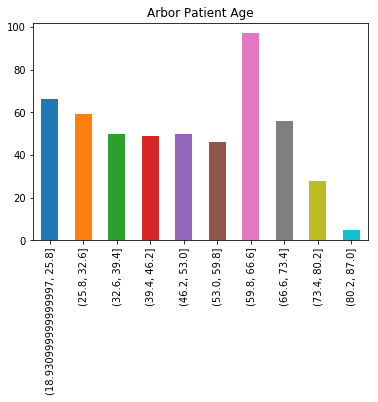

In [16]:
arbor_visits_clean['Age(Year)'].value_counts(sort=False,bins=10).plot(kind='bar', title='Arbor Patient Age')

In [17]:
pfc_visits_clean['Age(Year)'].value_counts(sort=False,bins=10)

(18.93, 25.9]    32
(25.9, 32.8]     41
(32.8, 39.7]     28
(39.7, 46.6]     26
(46.6, 53.5]     48
(53.5, 60.4]     65
(60.4, 67.3]     73
(67.3, 74.2]     32
(74.2, 81.1]     22
(81.1, 88.0]     11
Name: Age(Year), dtype: int64

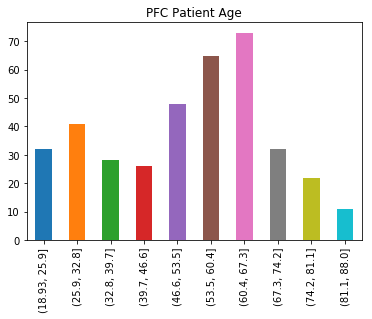

In [18]:
pfc_visits_clean['Age(Year)'].value_counts(sort=False,bins=10).plot(kind='bar', title='PFC Patient Age')

In [19]:
arbor_visits_clean['Age(Year)'].describe()

count    506.000000
mean      48.926877
std       17.706535
min       19.000000
25%       33.000000
50%       51.000000
75%       64.000000
max       87.000000
Name: Age(Year), dtype: float64

In [20]:
pfc_visits_clean['Age(Year)'].describe()

count    378.000000
mean      51.912698
std       17.006015
min       19.000000
25%       37.250000
50%       54.000000
75%       64.000000
max       88.000000
Name: Age(Year), dtype: float64

In [21]:
arbor_visits_clean['PatientNumber'].describe()

count          506
unique         424
top       N0059372
freq             5
Name: PatientNumber, dtype: object

In [22]:
pfc_visits_clean['PatientNumber'].describe()

count          378
unique         370
top       N0013706
freq             2
Name: PatientNumber, dtype: object

In [23]:
arbor_visits_clean.groupby(arbor_visits_clean['PatientNumber']).size().describe()

count    424.000000
mean       1.193396
std        0.523991
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        5.000000
dtype: float64

In [24]:
pfc_visits_clean.groupby(pfc_visits_clean['PatientNumber']).size().describe()

count    370.000000
mean       1.021622
std        0.145642
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        2.000000
dtype: float64

In [25]:
def get_grouped_data(df, column, group_keys=None, summed=True):
    grouped = df.groupby(df[column])
    visits_per_group = [] if group_keys is None else np.zeros(len(group_keys))
    if group_keys is not None:
        for c, group in enumerate(group_keys):
            if group in grouped.groups:
                visits_per_group[c] = len(grouped.groups[group])
    else:
        for group in grouped.groups:
            visits_per_group.append(len(grouped.groups[group]))
        
    if summed:
        return np.sum(visits_per_group)
    else:
        return visits_per_group

In [26]:
def visits_periodic(df, period='mom', group_keys=None):
    
    periodic_visits = []
    time_points = []
    spec_usage_mom = []
    
    if period == 'mom':
        months = [val for val in range(1, 13)]
        years = [2017, 2018]
        for year in years:
            for begin_month in months:
                tp1 = (year, begin_month, 1)
                tp2 = ()
                if begin_month == 12:
                    tp2 = (year+1, 1, 1)
                else:
                    tp2 = (year, begin_month+1, 1)
                    
                filtered = time_filter(tp1,tp2, df)
                
                if filtered.values.shape[0] == 0:
                    continue
                else:
                    periodic_visits.append(get_grouped_data(filtered, 'PatientNumber'))
                    spec_usage_mom.append(get_grouped_data(filtered, 'VisitType', group_keys = group_keys, summed=False))
                    time_points.append(str(begin_month) + '/' + str(year))
                    

    return (periodic_visits, np.array(spec_usage_mom), time_points)

In [27]:
arbor_spec_clinics = [
    'ARBOR CARDIOLOGY',
    'ARBOR DERMATOLOGY',
    'ARBOR FOLLOW-UP VISIT',
    'ARBOR GENERAL VISIT',
    'ARBOR MENTAL HEALTH',
    'ARBOR MSK',
    'ARBOR NEUROLOGY',
    'ARBOR OPHTHALMOLOGY',
    "ARBOR WOMEN'S HEALTH",
    'LAB FOLLOW-UP NOTE'
    ]


periodic_visits, spec_usage_mom, time_points = visits_periodic(arbor_visits_clean, 
                                                               group_keys=arbor_spec_clinics)
print np.sum(periodic_visits)
print spec_usage_mom
print time_points

arbor_specialty_clinics_df = pd.DataFrame({clinic:spec_usage_mom[:,col_idx] 
                                     for clinic, col_idx in zip(arbor_spec_clinics, range(spec_usage_mom.shape[1]))
                                    }, 
                                    index = time_points)

arbor_specialty_clinics_df.head(12)


506
[[ 0.  0.  0. 19.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. 44.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. 31.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. 11.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. 42.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. 25.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. 23.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. 22.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. 36.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. 29.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. 42.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. 51.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. 34.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. 56.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. 41.  0.  0.  0.  0.  0.  0.]]
['6/2017', '7/2017', '8/2017', '9/2017', '10/2017', '11/2017', '12/2017', '1/2018', '2/2018', '3/2018', '4/2018', '5/2018', '6/2018', '7/2018', '8/2018']


,ARBOR CARDIOLOGY,ARBOR DERMATOLOGY,ARBOR FOLLOW-UP VISIT,ARBOR GENERAL VISIT,ARBOR MENTAL HEALTH,ARBOR MSK,ARBOR NEUROLOGY,ARBOR OPHTHALMOLOGY,ARBOR WOMEN'S HEALTH,LAB FOLLOW-UP NOTE
6/2017,0.0,0.0,0.0,19.0,0.0,0.0,0.0,0.0,0.0,0.0
7/2017,0.0,0.0,0.0,44.0,0.0,0.0,0.0,0.0,0.0,0.0
8/2017,0.0,0.0,0.0,31.0,0.0,0.0,0.0,0.0,0.0,0.0
9/2017,0.0,0.0,0.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0
10/2017,0.0,0.0,0.0,42.0,0.0,0.0,0.0,0.0,0.0,0.0
11/2017,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0
12/2017,0.0,0.0,0.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0
1/2018,0.0,0.0,0.0,22.0,0.0,0.0,0.0,0.0,0.0,0.0
2/2018,0.0,0.0,0.0,36.0,0.0,0.0,0.0,0.0,0.0,0.0
3/2018,0.0,0.0,0.0,29.0,0.0,0.0,0.0,0.0,0.0,0.0


(0, 18)

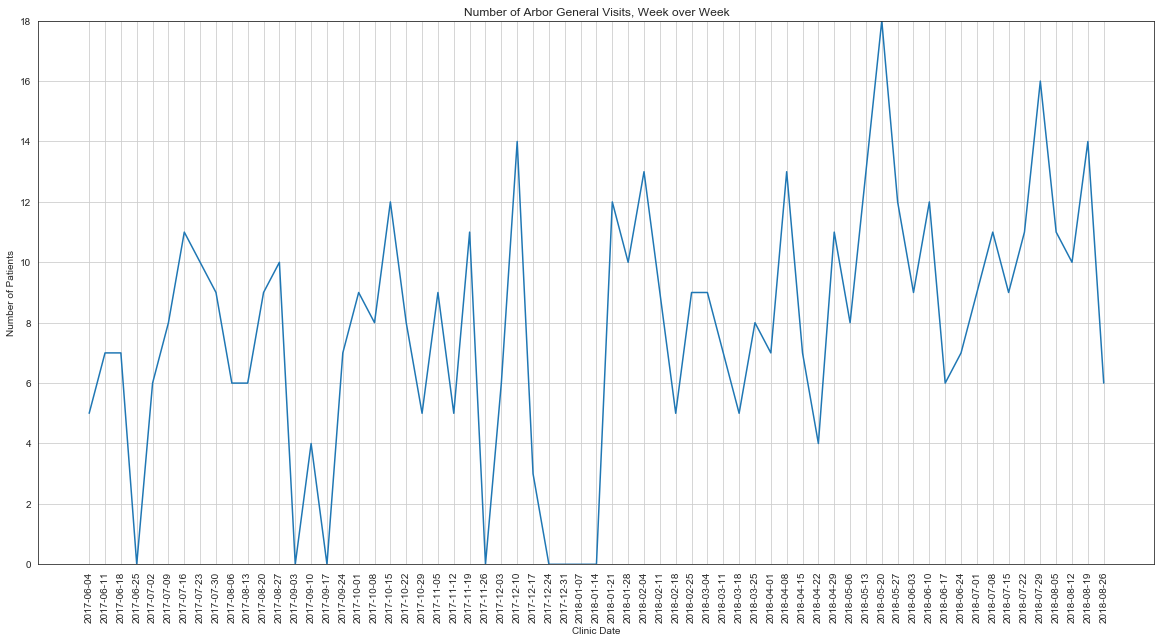

In [39]:
arbor_date_grouped = arbor_visits_clean.groupby(pd.Grouper(key='VisitDateTimeTS', freq='W-SUN'))
fig, ax = plt.subplots(figsize=(20,10))
plt.plot(arbor_date_grouped['PatientNumber'].count().index.strftime('%Y-%m-%d'), arbor_date_grouped['PatientNumber'].count().values)
plt.xticks(rotation=90)
ax.grid(True)
plt.title('Number of Arbor General Visits, Week over Week')
plt.xlabel('Clinic Date')
plt.ylabel('Number of Patients')
plt.ylim([0, 18])

(0, 18)

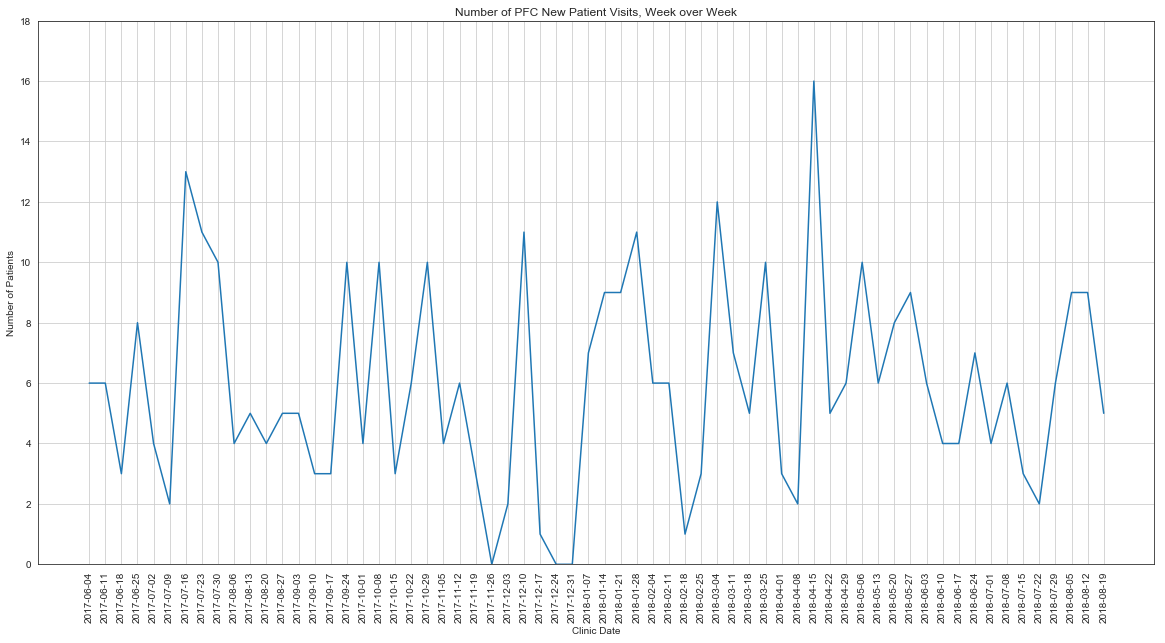

In [40]:
pfc_date_grouped = pfc_visits_clean.groupby(pd.Grouper(key='VisitDateTimeTS', freq='W-SUN'))
fig, ax = plt.subplots(figsize=(20,10))
plt.plot(pfc_date_grouped['PatientNumber'].count().index.strftime('%Y-%m-%d'), pfc_date_grouped['PatientNumber'].count().values)
plt.xticks(rotation=90)
ax.grid(True)
plt.title('Number of PFC New Patient Visits, Week over Week')
plt.xlabel('Clinic Date')
plt.ylabel('Number of Patients')
plt.ylim([0, 18])

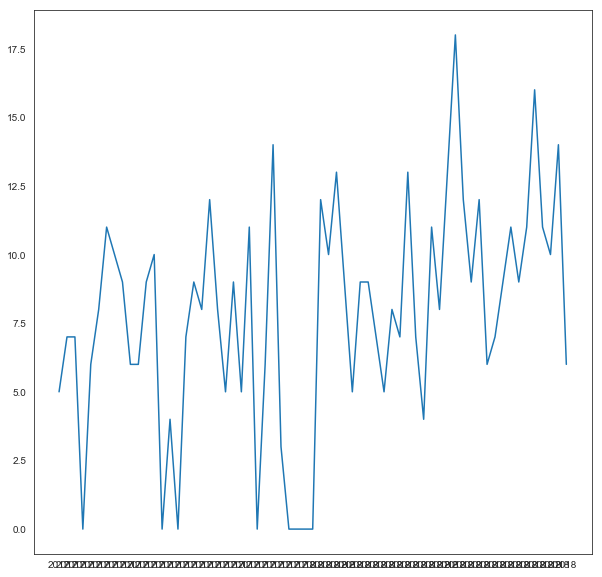

In [30]:
sns.set_style("white")
fig, ax = plt.subplots(figsize=(10,10))
sns.lineplot(data=arbor_date_grouped['PatientNumber'].count(), ax=ax)
ax.set_xticks(arbor_date_grouped['PatientNumber'].count().index.strftime('%Y-%m-%d'))

In [31]:
arbor_visits_clean['VisitDateTimeTS'].value_counts(sort=False,bins=12)

(2017-06-03 22:44:41.999999999, 2017-07-11 17:45:00]    33
(2017-07-11 17:45:00, 2017-08-18 02:00:00]              42
(2017-08-18 02:00:00, 2017-09-24 10:15:00]              26
(2017-09-24 10:15:00, 2017-10-31 18:30:00]              46
(2017-10-31 18:30:00, 2017-12-08 02:45:00]              31
(2017-12-08 02:45:00, 2018-01-14 11:00:00]              17
(2018-01-14 11:00:00, 2018-02-20 19:15:00]              49
(2018-02-20 19:15:00, 2018-03-30 03:30:00]              38
(2018-03-30 03:30:00, 2018-05-06 11:45:00]              49
(2018-05-06 11:45:00, 2018-06-12 20:00:00]              65
(2018-06-12 20:00:00, 2018-07-20 04:15:00]              42
(2018-07-20 04:15:00, 2018-08-26 12:30:00]              68
Name: VisitDateTimeTS, dtype: int64

In [32]:
pfc_visits_clean['VisitDateTimeTS'].value_counts(sort=False,bins=12)

(2017-06-02 22:54:53.999999999, 2017-07-10 03:35:00]    29
(2017-07-10 03:35:00, 2017-08-15 21:40:00]              43
(2017-08-15 21:40:00, 2017-09-21 15:45:00]              20
(2017-09-21 15:45:00, 2017-10-28 09:50:00]              36
(2017-10-28 09:50:00, 2017-12-04 03:55:00]              22
(2017-12-04 03:55:00, 2018-01-09 22:00:00]              19
(2018-01-09 22:00:00, 2018-02-15 16:05:00]              41
(2018-02-15 16:05:00, 2018-03-24 10:10:00]              31
(2018-03-24 10:10:00, 2018-04-30 04:15:00]              39
(2018-04-30 04:15:00, 2018-06-05 22:20:00]              39
(2018-06-05 22:20:00, 2018-07-12 16:25:00]              25
(2018-07-12 16:25:00, 2018-08-18 10:30:00]              34
Name: VisitDateTimeTS, dtype: int64

In [33]:
grouped = pfc_visits_clean.groupby('VisitType')
for g in grouped.groups:
    print g
    print len(grouped.groups[g])

PFC NEW PATIENT VISIT
378


In [34]:
arbor_visits_clean.groupby('VisitType').size()

VisitType
ARBOR GENERAL VISIT    506
dtype: int64

In [35]:
df_visits = pd.read_csv(path_visits, error_bad_lines=False, header=0)
df_visits['VisitDateTimeTS'] = pd.to_datetime((df_visits['VisitDateTime']))
df_visits['DateFirstKnownTS'] = pd.to_datetime((df_visits['DateFirstKnown']))
df_visits.index = df_visits['VisitDateTimeTS']
#df_visits = df_visits.iloc[::-1]
del df_visits['DateFirstKnown']
del df_visits['VisitDateTime']

df_visits = df_visits[df_visits['LocationAbbreviation'] != 'TEST']
df_visits_clean = df_visits[df_visits['Age(Year)']> 18]
df_visits_clean.sort_values('VisitDateTimeTS', inplace=True)

/Users/alex/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


In [36]:
df_visits_clean.groupby('VisitType').size()

VisitType
ADMIN CHART REVIEW NOTE             18
ARBOR CARDIOLOGY                    12
ARBOR DERMATOLOGY                    9
ARBOR FAST TRACK TB                  2
ARBOR FAST TRACK VACCINE             1
ARBOR FOLLOW-UP VISIT               10
ARBOR GENERAL VISIT                506
ARBOR MENTAL HEALTH                 19
ARBOR MSK                           20
ARBOR NEUROLOGY                      4
ARBOR OPHTHALMOLOGY                 16
ARBOR WOMEN'S HEALTH                 8
BRIDGE TO CARE NOTE                  7
HEALTH EDUCATOR NOTE               127
LAB FOLLOW-UP NOTE                 340
MISC NOTE                          345
PATIENT NAVIGATOR NOTE             170
PFC DERMATOLOGY VISIT               38
PFC FAST TRACK                      31
PFC FAST TRACK VACCINE              31
PFC FOLLOW UP VISIT                404
PFC HEP CLINIC VISIT                33
PFC HEPATITIS VACCINE SCREENING      3
PFC MENTAL HEALTH VISIT             10
PFC NEW PATIENT VISIT              378
PFC OPHTHALMOLO

In [41]:
ALL_SPEC_KEYS = [
    'ARBOR CARDIOLOGY',
    'ARBOR DERMATOLOGY',
    'ARBOR FOLLOW-UP VISIT',
    'ARBOR GENERAL VISIT',
    'ARBOR MENTAL HEALTH',
    'ARBOR MSK',
    'ARBOR NEUROLOGY',
    'ARBOR OPHTHALMOLOGY',
    "ARBOR WOMEN'S HEALTH",
    'PFC DERMATOLOGY VISIT',
    'PFC FOLLOW UP VISIT',
    'PFC HEP CLINIC VISIT',
    'PFC MENTAL HEALTH VISIT',
    'PFC NEW PATIENT VISIT',
    'PFC OPHTHALMOLOGY VISIT',
    "PFC WOMEN'S CLINIC VISIT",
    'PFC FAST TRACK VACCINE'
]


periodic_visits, spec_usage_mom, time_points = visits_periodic(df_visits_clean, 
                                                               group_keys=ALL_SPEC_KEYS)
print np.sum(periodic_visits)
print spec_usage_mom
print time_points

joint_spec_df = pd.DataFrame({clinic:spec_usage_mom[:,col_idx] 
                                     for clinic, col_idx in zip(ALL_SPEC_KEYS, range(spec_usage_mom.shape[1]))
                                    }, 
                                    index = time_points)

joint_spec_df.head(20)


2642
[[ 0.  0.  0. 19.  0.  0.  0.  0.  0.  4. 27.  6.  1. 23.  0.  3.  2.]
 [ 4.  0.  0. 44.  0.  5.  0.  4.  0.  0. 33.  0.  0. 40.  7.  3.  2.]
 [ 0.  0.  0. 31.  0.  0.  1.  2.  1.  7. 34.  0.  0. 18.  0.  5. 14.]
 [ 0.  1.  0. 11.  2.  0.  0.  0.  0.  0. 30.  0.  1. 25.  6.  2.  1.]
 [ 1.  0.  0. 42.  1.  0.  0.  0.  1.  3. 21.  9.  0. 29.  2.  3.  1.]
 [ 0.  0.  0. 25.  0.  0.  0.  0.  0.  0. 16.  0.  2. 13.  0.  3.  1.]
 [ 0.  0.  0. 23.  3.  6.  0.  0.  0.  6. 12.  6.  0. 14.  2.  0.  2.]
 [ 0.  0.  0. 22.  5.  0.  0.  0.  0.  0. 22.  5.  0. 36.  7.  5.  0.]
 [ 3.  0.  0. 36.  0.  0.  0.  0.  0.  6. 28.  0.  3. 16.  0.  5.  2.]
 [ 0.  2.  0. 29.  2.  0.  0.  0.  3.  0. 25.  4.  0. 37.  5.  0.  1.]
 [ 0.  0.  1. 42.  3.  3.  2.  0.  2.  5. 25.  0.  0. 29.  6.  1.  0.]
 [ 4.  1.  2. 51.  0.  3.  0.  5.  0.  0. 35.  3.  3. 33.  0.  4.  1.]
 [ 0.  0.  7. 34.  0.  0.  0.  0.  0.  4. 34.  0.  0. 25.  3.  5.  0.]
 [ 0.  5.  0. 56.  0.  3.  1.  0.  1.  0. 36.  0.  0. 17.  9.  6.  4.]
 

,ARBOR CARDIOLOGY,ARBOR DERMATOLOGY,ARBOR FOLLOW-UP VISIT,ARBOR GENERAL VISIT,ARBOR MENTAL HEALTH,ARBOR MSK,ARBOR NEUROLOGY,ARBOR OPHTHALMOLOGY,ARBOR WOMEN'S HEALTH,PFC DERMATOLOGY VISIT,PFC FAST TRACK VACCINE,PFC FOLLOW UP VISIT,PFC HEP CLINIC VISIT,PFC MENTAL HEALTH VISIT,PFC NEW PATIENT VISIT,PFC OPHTHALMOLOGY VISIT,PFC WOMEN'S CLINIC VISIT
6/2017,0.0,0.0,0.0,19.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,27.0,6.0,1.0,23.0,0.0,3.0
7/2017,4.0,0.0,0.0,44.0,0.0,5.0,0.0,4.0,0.0,0.0,2.0,33.0,0.0,0.0,40.0,7.0,3.0
8/2017,0.0,0.0,0.0,31.0,0.0,0.0,1.0,2.0,1.0,7.0,14.0,34.0,0.0,0.0,18.0,0.0,5.0
9/2017,0.0,1.0,0.0,11.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,30.0,0.0,1.0,25.0,6.0,2.0
10/2017,1.0,0.0,0.0,42.0,1.0,0.0,0.0,0.0,1.0,3.0,1.0,21.0,9.0,0.0,29.0,2.0,3.0
11/2017,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,16.0,0.0,2.0,13.0,0.0,3.0
12/2017,0.0,0.0,0.0,23.0,3.0,6.0,0.0,0.0,0.0,6.0,2.0,12.0,6.0,0.0,14.0,2.0,0.0
1/2018,0.0,0.0,0.0,22.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0,5.0,0.0,36.0,7.0,5.0
2/2018,3.0,0.0,0.0,36.0,0.0,0.0,0.0,0.0,0.0,6.0,2.0,28.0,0.0,3.0,16.0,0.0,5.0
3/2018,0.0,2.0,0.0,29.0,2.0,0.0,0.0,0.0,3.0,0.0,1.0,25.0,4.0,0.0,37.0,5.0,0.0


In [38]:
joint_spec_df.to_csv('joint_spec_clinics.csv')